In [1]:
import pickle
import requests
from bs4 import BeautifulSoup
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import diagnostic_plots
import unicodedata

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import KFold
from sklearn.model_selection import learning_curve
from sklearn.linear_model import Lasso
%matplotlib inline

with open('all_top40.pkl', 'rb') as picklefile:
    df2 = pickle.load(picklefile)

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df2 = df2[df2['Pos'] != '1']

In [3]:
df2.shape

(340, 28)

In [4]:
#NO ROOKIES, BETTER FOR LINEAR TRANSFORMATION, NOT LOG

df2 = df2[(df2['Total_games_played'] > 162) & (df2['OPS'] < 1) & (df2['Salary'] > 500000) & (df2['Age'] > 25)]

In [5]:
df2.shape

(210, 28)

In [6]:
## SET UP FINAL TRAIN/TEST

# y = df2.Salary
# X = df2.drop(['Salary'],1)
# X_train, X_FINALTEST, y_train, y_FINALTEST = train_test_split(X, y, test_size=0.3, random_state=55)

In [7]:
df3 = df2.copy(deep=True)

In [8]:
X=patsy.dmatrix('Pos',data=df3,return_type='dataframe')
X.head()

,Intercept,Pos[T.3],Pos[T.4],Pos[T.5],Pos[T.6],Pos[T.7],Pos[T.8],Pos[T.9],Pos[T.D]
Player_Name,,,,,,,,,
A.J. Ellis,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A.J. Pollock,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Aaron Altherr,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Aaron Hicks,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Abraham Almonte,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [9]:
df3=df3.join(X)

In [10]:
df3['First_Base'] = df3['Pos[T.3]']
df3['Second_Base'] = df3['Pos[T.4]']
df3['Third_Base'] = df3['Pos[T.5]']
df3['Shortstop'] = df3['Pos[T.6]']
df3['Left_Field'] = df3['Pos[T.7]']
df3['Center_Field'] = df3['Pos[T.8]']
df3['Right_Field'] = df3['Pos[T.9]']
df3['DH'] = df3['Pos[T.D]']

df3 = df3.drop(['Pos[T.3]','Pos[T.4]','Pos[T.5]','Pos[T.6]','Pos[T.7]','Pos[T.8]','Pos[T.9]','Pos[T.D]'],1)

df3

,index,Games_Played,Plate_Appearances,At_Bats,Runs,Hits,2B,3B,HR,RBI,...,Pos,Intercept,First_Base,Second_Base,Third_Base,Shortstop,Left_Field,Center_Field,Right_Field,DH
Player_Name,,,,,,,,,,,,,,,,,,,,,
A.J. Ellis,1.0,78.571429,282.714286,239.428571,24.000000,56.285714,9.857143,0.428571,6.142857,28.142857,...,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A.J. Pollock,3.0,87.333333,341.166667,310.666667,51.000000,89.000000,20.500000,4.000000,8.833333,33.166667,...,8,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Aaron Altherr,5.0,51.250000,201.250000,178.000000,26.500000,43.250000,10.250000,2.250000,7.000000,27.250000,...,9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Aaron Hicks,7.0,91.600000,330.000000,289.400000,38.600000,67.000000,12.200000,1.400000,8.600000,32.200000,...,8,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Abraham Almonte,12.0,60.400000,189.800000,172.400000,23.000000,42.400000,10.800000,2.000000,2.800000,16.800000,...,8,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Adam Duvall,15.0,90.500000,351.000000,319.000000,44.250000,76.750000,18.000000,2.250000,18.000000,54.000000,...,7,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Adam Eaton,16.0,90.666667,403.333333,356.833333,58.000000,101.500000,17.166667,5.833333,6.000000,31.666667,...,9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Adam Jones,19.0,152.571429,653.428571,610.571429,85.857143,170.428571,28.857143,1.714286,28.714286,86.714286,...,8,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Adeiny Hechavarria,28.0,119.500000,447.166667,418.833333,39.333333,106.833333,15.000000,5.833333,3.666667,34.500000,...,6,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [11]:
batters_only = df3.copy(deep=True)

In [12]:
batters_only = batters_only.rename(index=str, columns={"2B": "Doubles", "3B": "Triples"})

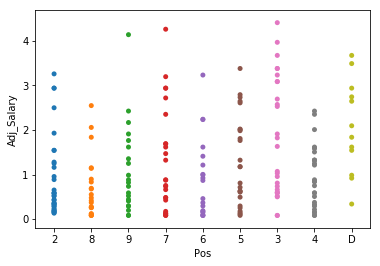

In [13]:
sns.stripplot(x="Pos", y="Adj_Salary", data=batters_only)

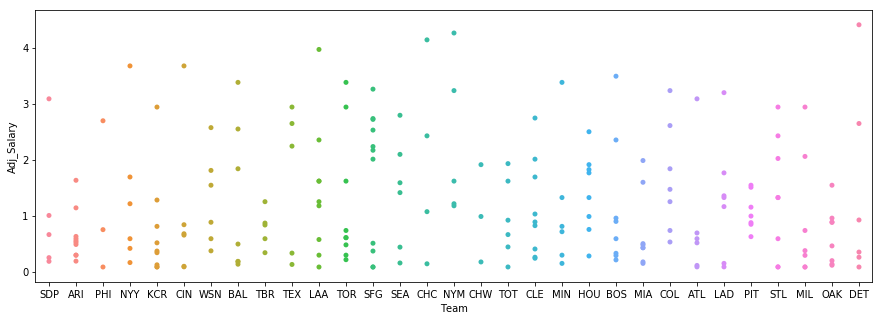

In [14]:
fig, ax = plt.subplots(figsize=(15,5))
sns.stripplot(x="Team", y="Adj_Salary", data=batters_only, ax=ax)

In [15]:
batters_only_df = batters_only[['Runs', 'Hits', 'Doubles', 'Triples', 'HR', 'RBI', 'BA', 'OBP', 'SLG',
                                'OPS', 'SB', 'TB', 'SF', 'Age', 'Total_games_played',
                                'dWAR','All_star_count','First_Base','Second_Base','Third_Base',
                                'Shortstop','Left_Field','Center_Field','Right_Field','DH','Salary']]

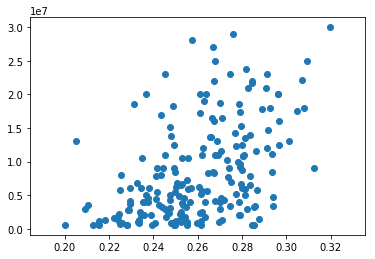

In [16]:
## Remove players below Mendoza line

batters_only_df = batters_only_df[batters_only_df['BA'] > 0.2]

plt.scatter(batters_only_df['BA'], batters_only_df['Salary'])

In [17]:
batters_only_df

,Runs,Hits,Doubles,Triples,HR,RBI,BA,OBP,SLG,OPS,...,All_star_count,First_Base,Second_Base,Third_Base,Shortstop,Left_Field,Center_Field,Right_Field,DH,Salary
Player_Name,,,,,,,,,,,,,,,,,,,,,
A.J. Ellis,24.000000,56.285714,9.857143,0.428571,6.142857,28.142857,0.233300,0.336991,0.354413,0.691404,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1250000.0
A.J. Pollock,51.000000,89.000000,20.500000,4.000000,8.833333,33.166667,0.273747,0.335573,0.443354,0.778927,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7750000.0
Aaron Hicks,38.600000,67.000000,12.200000,1.400000,8.600000,32.200000,0.229163,0.315112,0.364295,0.679407,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2825000.0
Abraham Almonte,23.000000,42.400000,10.800000,2.000000,2.800000,16.800000,0.248115,0.301156,0.382594,0.683751,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,825000.0
Adam Duvall,44.250000,76.750000,18.000000,2.250000,18.000000,54.000000,0.225049,0.284313,0.451360,0.735673,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,645000.0
Adam Eaton,58.000000,101.500000,17.166667,5.833333,6.000000,31.666667,0.279859,0.362290,0.415633,0.777923,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6000000.0
Adam Jones,85.857143,170.428571,28.857143,1.714286,28.714286,86.714286,0.278898,0.317446,0.472643,0.790088,...,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,17333333.0
Adeiny Hechavarria,39.333333,106.833333,15.000000,5.833333,3.666667,34.500000,0.255714,0.290104,0.351886,0.641991,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5900000.0
Adrian Beltre,80.428571,165.571429,30.857143,1.285714,26.285714,90.571429,0.307985,0.360664,0.518487,0.879151,...,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,18000000.0


In [18]:
training_df = batters_only_df.copy(deep=True)

In [19]:
training_df['Salary']

Player_Name
A.J. Ellis             1250000.0
A.J. Pollock           7750000.0
Aaron Hicks            2825000.0
Abraham Almonte         825000.0
Adam Duvall             645000.0
Adam Eaton             6000000.0
Adam Jones            17333333.0
Adeiny Hechavarria     5900000.0
Adrian Beltre         18000000.0
Albert Pujols         27000000.0
Alcides Escobar        2500000.0
Aledmys Diaz           2000000.0
Alex Avila             4000000.0
Alex Gordon           20000000.0
Andrelton Simmons     11000000.0
Andrew McCutchen      14750000.0
Andrew Romine          1050000.0
Anthony Rendon        12300000.0
Anthony Rizzo          7285714.0
Asdrubal Cabrera       8250000.0
Avisail Garcia         6700000.0
Ben Zobrist           16500000.0
Billy Hamilton         4600000.0
Brad Miller            4500000.0
Brandon Belt          17200000.0
Brandon Crawford      15200000.0
Brandon Guyer          2750000.0
Brett Gardner         11500000.0
Brian Dozier           9000000.0
Brian McCann          17000000.

In [20]:
training_df.describe()

,Runs,Hits,Doubles,Triples,HR,RBI,BA,OBP,SLG,OPS,...,All_star_count,First_Base,Second_Base,Third_Base,Shortstop,Left_Field,Center_Field,Right_Field,DH,Salary
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,...,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,2.020000e+02
mean,51.583215,101.150389,20.066325,2.230068,12.935372,48.941348,0.259753,0.324591,0.416724,0.741316,...,0.950495,0.128713,0.133663,0.123762,0.094059,0.123762,0.099010,0.099010,0.059406,8.368710e+06
std,20.684818,37.920569,8.042511,1.601319,8.040475,22.510261,0.023463,0.027517,0.052271,0.071554,...,1.344798,0.335714,0.341136,0.330128,0.292637,0.330128,0.299417,0.299417,0.236970,7.133741e+06
min,7.000000,16.500000,3.200000,0.000000,0.833333,7.666667,0.200174,0.256443,0.285281,0.541724,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.590000e+05
25%,35.857143,71.488095,13.714286,0.892857,6.892857,32.050000,0.243691,0.308513,0.382886,0.691596,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.600000e+06
50%,51.550000,102.800000,20.750000,2.000000,11.414286,46.916667,0.261140,0.323008,0.417559,0.743785,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000e+06
75%,67.285714,130.000000,25.964286,3.333333,17.276786,64.598214,0.278834,0.342205,0.448053,0.784688,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.247500e+07
max,101.714286,181.500000,38.714286,8.142857,35.428571,104.857143,0.319681,0.437400,0.557986,0.961231,...,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000e+07


In [21]:
training_df.columns

Index(['Runs', 'Hits', 'Doubles', 'Triples', 'HR', 'RBI', 'BA', 'OBP', 'SLG',
       'OPS', 'SB', 'TB', 'SF', 'Age', 'Total_games_played', 'dWAR',
       'All_star_count', 'First_Base', 'Second_Base', 'Third_Base',
       'Shortstop', 'Left_Field', 'Center_Field', 'Right_Field', 'DH',
       'Salary'],
      dtype='object')

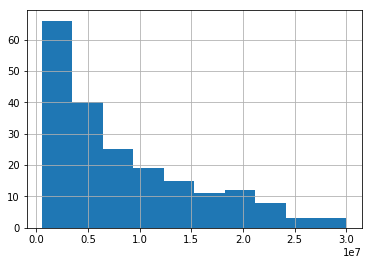

In [22]:
training_df.Salary.hist()

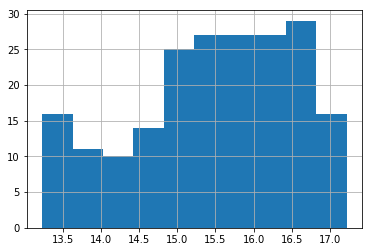

In [23]:
training_df['log_salary'] = np.log(training_df.Salary)

training_df.log_salary.hist()

In [24]:
from scipy import stats

y_transformed, _ = stats.boxcox(training_df.Salary)

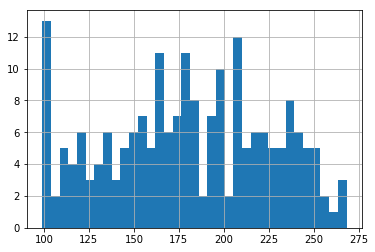

In [25]:
pd.Series(y_transformed).hist(bins=35)

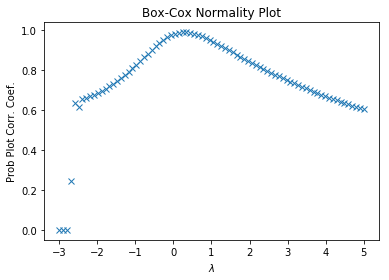

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
prob = stats.boxcox_normplot(training_df.Salary, -3, 5, plot=ax)

0.2935990247277316


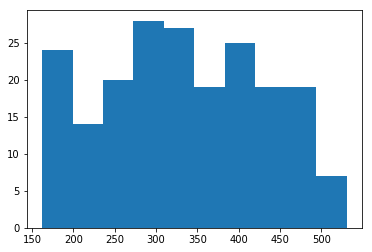

In [27]:
lamb=stats.boxcox_normmax(training_df.Salary, brack=(-1.9, 1.9))
print(lamb)
training_df['y_t'] =(np.power(training_df.Salary,lamb)-1)/lamb

plt.hist(training_df['y_t']);

In [28]:
from scipy.special import inv_boxcox

training_df['real_salary'] = inv_boxcox(training_df['y_t'], lamb)

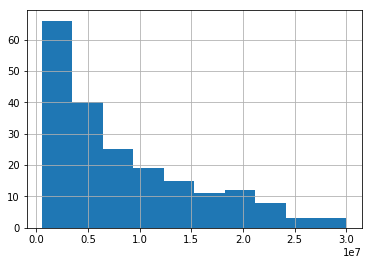

In [29]:
training_df.real_salary.hist()

In [30]:
training_df.loc[:,'rootASC'] = training_df.loc[:,'All_star_count'] ** 0.5

In [31]:
training_df.corr()

,Runs,Hits,Doubles,Triples,HR,RBI,BA,OBP,SLG,OPS,...,Shortstop,Left_Field,Center_Field,Right_Field,DH,Salary,log_salary,y_t,real_salary,rootASC
Runs,1.000000,0.939034,0.908077,0.424116,0.743486,0.863177,0.578899,0.636932,0.689524,0.748637,...,-0.122265,0.058856,-0.072199,0.106020,0.131836,0.699692,0.730822,0.741950,0.699692,0.657130
Hits,0.939034,1.000000,0.941402,0.398313,0.656045,0.859884,0.701693,0.604899,0.641594,0.701306,...,-0.062689,0.007303,-0.114548,0.029814,0.123279,0.709202,0.760727,0.765803,0.709202,0.664708
Doubles,0.908077,0.941402,1.000000,0.291095,0.689376,0.872500,0.635928,0.611356,0.705632,0.750568,...,-0.115823,0.012883,-0.166453,0.019277,0.110085,0.681959,0.721153,0.729400,0.681959,0.642319
Triples,0.424116,0.398313,0.291095,1.000000,-0.050059,0.083031,0.351702,0.180973,0.065689,0.117580,...,0.143304,0.161139,0.164749,0.113534,-0.169460,0.117710,0.211444,0.188680,0.117710,0.149116
HR,0.743486,0.656045,0.689376,-0.050059,1.000000,0.919367,0.275666,0.433635,0.863835,0.797792,...,-0.254685,0.032071,-0.181950,0.058291,0.346949,0.612840,0.596259,0.618084,0.612840,0.559186
RBI,0.863177,0.859884,0.872500,0.083031,0.919367,1.000000,0.493345,0.552397,0.826049,0.815860,...,-0.192342,0.011067,-0.213933,0.031028,0.268998,0.722763,0.719302,0.740676,0.722763,0.662403
BA,0.578899,0.701693,0.635928,0.351702,0.275666,0.493345,1.000000,0.672753,0.539280,0.652658,...,-0.085862,-0.005610,-0.049766,0.001987,0.056827,0.481834,0.493817,0.503346,0.481834,0.494417
OBP,0.636932,0.604899,0.611356,0.180973,0.433635,0.552397,0.672753,1.000000,0.566850,0.798643,...,-0.206795,-0.028771,-0.166022,0.115489,0.085780,0.565779,0.555854,0.573430,0.565779,0.505428
SLG,0.689524,0.641594,0.705632,0.065689,0.863835,0.826049,0.539280,0.566850,1.000000,0.948490,...,-0.298270,0.042712,-0.142807,0.105551,0.300776,0.555955,0.539170,0.559163,0.555955,0.539564
OPS,0.748637,0.701306,0.750568,0.117580,0.797792,0.815860,0.652658,0.798643,0.948490,1.000000,...,-0.297412,0.020137,-0.168166,0.121517,0.252705,0.623702,0.607624,0.628988,0.623702,0.588520


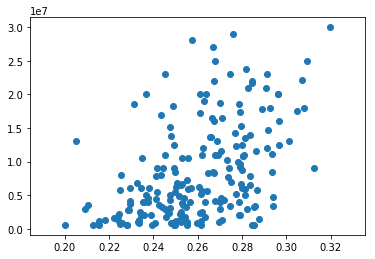

In [32]:
plt.scatter(training_df['BA'], training_df['Salary'])

In [33]:
#X2=patsy.dmatrix('Team',data=training_df,return_type='dataframe')
#X2.head()

In [34]:
#training_df=training_df.join(X2)

In [35]:
#training_df['LAA'] = training_df['Team[T.LAA]']
#training_df['LAD'] = training_df['Team[T.LAD]']
#training_df['PIT'] = training_df['Team[T.PIT]']
#training_df['SDP'] = training_df['Team[T.SDP]']
#training_df['STL'] = training_df['Team[T.STL]']
#training_df['TBR'] = training_df['Team[T.TBR]']
#training_df['TOR'] = training_df['Team[T.TOR]']
#training_df['WSN'] = training_df['Team[T.WSN]']
#training_df['SFG'] = training_df['Team[T.SFG]']
#training_df['NYM'] = training_df['Team[T.NYM]']
#training_df['MIA'] = training_df['Team[T.MIA]']


#training_df = training_df.drop(['Team[T.LAA]','Team[T.LAD]','Team[T.PIT]',
#                                        'Team[T.SDP]','Team[T.STL]','Team[T.TBR]',
#                                        'Team[T.TOR]','Team[T.WSN]','Team[T.SFG]','Team[T.NYM]','Team[T.MIA]'],1)

In [36]:
#training_df['ATL'] = training_df['Team[T.ATL]']
#training_df['BAL'] = training_df['Team[T.BAL]']
#training_df['BOS'] = training_df['Team[T.BOS]']
#training_df['CHC'] = training_df['Team[T.CHC]']
#training_df['CHW'] = training_df['Team[T.CHW]']
#training_df['CIN'] = training_df['Team[T.CIN]']
#training_df['CLE'] = training_df['Team[T.CLE]']
#training_df['COL'] = training_df['Team[T.COL]']
#training_df['HOU'] = training_df['Team[T.HOU]']
#training_df['KCR'] = training_df['Team[T.KCR]']
#training_df['MIL'] = training_df['Team[T.MIL]']
#training_df['MIN'] = training_df['Team[T.MIN]']
#training_df['NYY'] = training_df['Team[T.NYY]']
#training_df['OAK'] = training_df['Team[T.OAK]']
#training_df['PHI'] = training_df['Team[T.PHI]']
#training_df['SEA'] = training_df['Team[T.SEA]']
#training_df['TEX'] = training_df['Team[T.TEX]']
#training_df['TOT'] = training_df['Team[T.TOT]']


#training_df = training_df.drop(['Team[T.ATL]','Team[T.BAL]','Team[T.BOS]',
#                                        'Team[T.CHC]','Team[T.CHW]','Team[T.CIN]',
#                                        'Team[T.CLE]','Team[T.COL]','Team[T.HOU]',
#                                        'Team[T.KCR]','Team[T.MIL]','Team[T.MIN]',
#                                        'Team[T.NYY]','Team[T.OAK]','Team[T.PHI]',
#                                        'Team[T.SEA]','Team[T.TEX]','Team[T.TOT]',
#                                        'Team', 'Intercept'],1)

In [37]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, A.J. Ellis to Yuli Gurriel
Data columns (total 30 columns):
Runs                  202 non-null float64
Hits                  202 non-null float64
Doubles               202 non-null float64
Triples               202 non-null float64
HR                    202 non-null float64
RBI                   202 non-null float64
BA                    202 non-null float64
OBP                   202 non-null float64
SLG                   202 non-null float64
OPS                   202 non-null float64
SB                    202 non-null float64
TB                    202 non-null float64
SF                    202 non-null float64
Age                   202 non-null int64
Total_games_played    202 non-null int64
dWAR                  202 non-null float64
All_star_count        202 non-null float64
First_Base            202 non-null float64
Second_Base           202 non-null float64
Third_Base            202 non-null float64
Shortstop             202 

In [38]:
## SET UP FINAL TRAIN/TEST

y = training_df['y_t']
X = training_df.drop(['y_t'],1)
X_FINALtrain, X_FINALTEST, y_FINALtrain, y_FINALTEST = train_test_split(X, y, test_size=0.3, random_state=55)

In [39]:
REAL_TRAIN_Y = pd.DataFrame(y_FINALtrain)

In [40]:
REAL_TRAIN_Y.reset_index(inplace=True)

In [41]:
## CREATE FULL TRAINING DATASET

X_FINALtrain.reset_index(inplace=True)

final_train = pd.merge(X_FINALtrain, REAL_TRAIN_Y)

final_train = final_train.set_index('Player_Name')

In [42]:
final_train

,Runs,Hits,Doubles,Triples,HR,RBI,BA,OBP,SLG,OPS,...,Shortstop,Left_Field,Center_Field,Right_Field,DH,Salary,log_salary,real_salary,rootASC,y_t
Player_Name,,,,,,,,,,,,,,,,,,,,,
Dexter Fowler,77.428571,125.571429,24.000000,8.142857,12.285714,47.571429,0.270775,0.371094,0.436912,0.808006,...,0.0,0.0,0.0,1.0,0.0,16500000.0,16.618871,16500000.0,1.000000,444.608049
Alex Avila,38.428571,76.857143,16.285714,1.142857,10.714286,42.428571,0.235812,0.352817,0.390234,0.743051,...,0.0,0.0,0.0,0.0,0.0,4000000.0,15.201805,4000000.0,1.000000,292.125486
Jake Smolinski,16.250000,34.500000,4.750000,1.000000,4.000000,16.250000,0.259700,0.320410,0.380055,0.700466,...,0.0,0.0,1.0,0.0,0.0,775000.0,13.560618,775000.0,0.000000,179.125832
Christian Vazquez,26.333333,58.333333,12.000000,1.000000,2.333333,21.333333,0.252289,0.305230,0.340344,0.645574,...,0.0,0.0,0.0,0.0,0.0,1425000.0,14.169682,1425000.0,0.000000,214.866701
Francisco Cervelli,25.285714,53.714286,8.857143,1.285714,3.142857,21.428571,0.234927,0.379887,0.345699,0.725587,...,0.0,0.0,0.0,0.0,0.0,10500000.0,16.166886,10500000.0,0.000000,388.931405
Steve Pearce,29.142857,58.000000,12.285714,0.571429,10.142857,30.000000,0.250355,0.329375,0.422993,0.752368,...,0.0,0.0,0.0,0.0,1.0,6250000.0,15.648092,6250000.0,0.000000,333.500298
Jason Heyward,69.000000,127.714286,24.428571,3.000000,13.857143,55.428571,0.257546,0.335224,0.404345,0.739569,...,0.0,0.0,0.0,1.0,0.0,28166667.0,17.153650,28166667.0,0.000000,520.774006
Eric Thames,56.000000,91.333333,20.666667,4.000000,17.333333,41.666667,0.247413,0.315227,0.457483,0.772710,...,0.0,0.0,0.0,0.0,0.0,5000000.0,15.424948,5000000.0,0.000000,312.135469
Giancarlo Stanton,75.857143,123.857143,25.857143,1.285714,35.000000,87.571429,0.267784,0.360754,0.557986,0.918739,...,0.0,0.0,0.0,0.0,1.0,25000000.0,17.034386,25000000.0,2.000000,502.737143


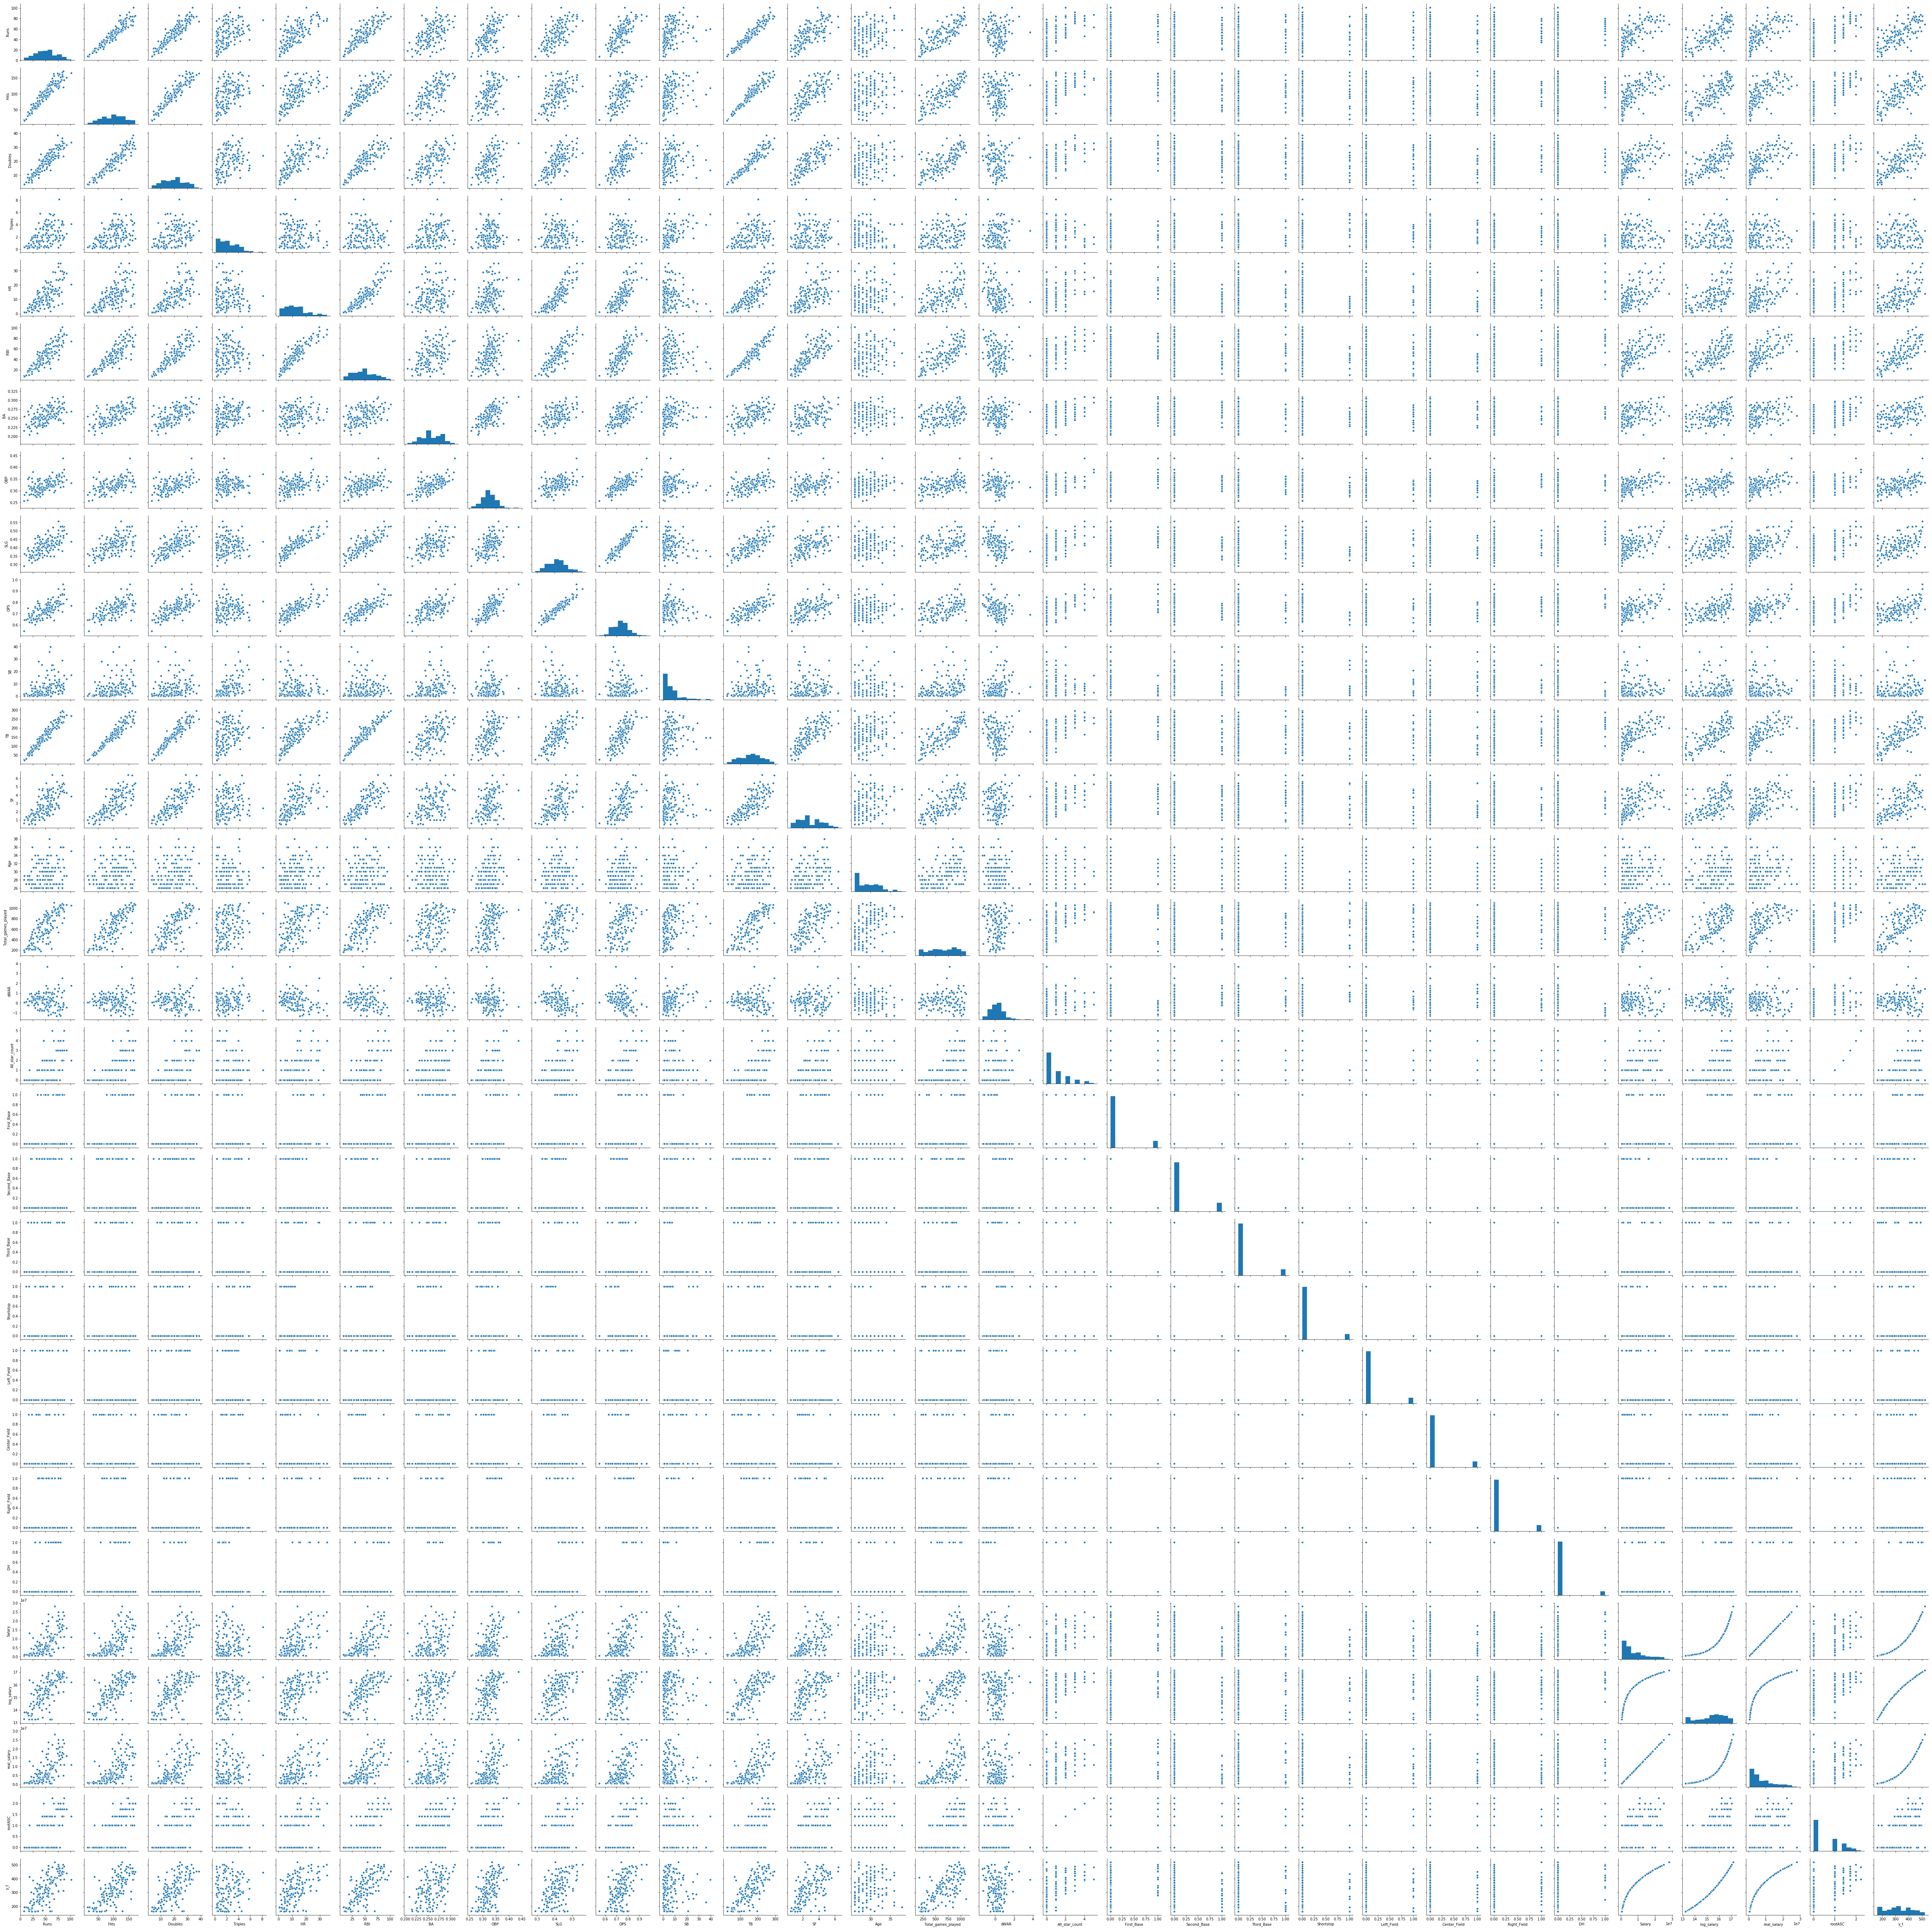

In [43]:
sns.pairplot(final_train)

In [44]:
X_FINALtrain

,Player_Name,Runs,Hits,Doubles,Triples,HR,RBI,BA,OBP,SLG,...,Third_Base,Shortstop,Left_Field,Center_Field,Right_Field,DH,Salary,log_salary,real_salary,rootASC
0,Dexter Fowler,77.428571,125.571429,24.000000,8.142857,12.285714,47.571429,0.270775,0.371094,0.436912,...,0.0,0.0,0.0,0.0,1.0,0.0,16500000.0,16.618871,16500000.0,1.000000
1,Alex Avila,38.428571,76.857143,16.285714,1.142857,10.714286,42.428571,0.235812,0.352817,0.390234,...,0.0,0.0,0.0,0.0,0.0,0.0,4000000.0,15.201805,4000000.0,1.000000
2,Jake Smolinski,16.250000,34.500000,4.750000,1.000000,4.000000,16.250000,0.259700,0.320410,0.380055,...,0.0,0.0,0.0,1.0,0.0,0.0,775000.0,13.560618,775000.0,0.000000
3,Christian Vazquez,26.333333,58.333333,12.000000,1.000000,2.333333,21.333333,0.252289,0.305230,0.340344,...,0.0,0.0,0.0,0.0,0.0,0.0,1425000.0,14.169682,1425000.0,0.000000
4,Francisco Cervelli,25.285714,53.714286,8.857143,1.285714,3.142857,21.428571,0.234927,0.379887,0.345699,...,0.0,0.0,0.0,0.0,0.0,0.0,10500000.0,16.166886,10500000.0,0.000000
5,Steve Pearce,29.142857,58.000000,12.285714,0.571429,10.142857,30.000000,0.250355,0.329375,0.422993,...,0.0,0.0,0.0,0.0,0.0,1.0,6250000.0,15.648092,6250000.0,0.000000
6,Jason Heyward,69.000000,127.714286,24.428571,3.000000,13.857143,55.428571,0.257546,0.335224,0.404345,...,0.0,0.0,0.0,0.0,1.0,0.0,28166667.0,17.153650,28166667.0,0.000000
7,Eric Thames,56.000000,91.333333,20.666667,4.000000,17.333333,41.666667,0.247413,0.315227,0.457483,...,0.0,0.0,0.0,0.0,0.0,0.0,5000000.0,15.424948,5000000.0,0.000000
8,Giancarlo Stanton,75.857143,123.857143,25.857143,1.285714,35.000000,87.571429,0.267784,0.360754,0.557986,...,0.0,0.0,0.0,0.0,0.0,1.0,25000000.0,17.034386,25000000.0,2.000000
9,Kolten Wong,44.600000,86.200000,15.400000,3.400000,6.400000,33.600000,0.237669,0.301891,0.342122,...,0.0,0.0,0.0,0.0,0.0,0.0,4000000.0,15.201805,4000000.0,0.000000


In [45]:
y_FINALtrain

Player_Name
Dexter Fowler         444.608049
Alex Avila            292.125486
Jake Smolinski        179.125832
Christian Vazquez     214.866701
Francisco Cervelli    388.931405
Steve Pearce          333.500298
Jason Heyward         520.774006
Eric Thames           312.135469
Giancarlo Stanton     502.737143
Kolten Wong           292.125486
Paulo Orlando         163.252945
Asdrubal Cabrera      362.112631
Kole Calhoun          365.330410
Mike Zunino           267.522594
Justin Upton          440.578682
Gerardo Parra         383.351334
Ian Kinsler           394.326802
J.D. Martinez         495.171907
Brock Holt            245.373897
Carlos Gonzalez       312.135469
Paul Goldschmidt      395.384993
Josh Harrison         386.165407
Eduardo Escobar       309.326227
Russell Martin        470.640203
Cesar Hernandez       313.975381
Alex Gordon           470.640203
Joey Votto            502.737143
Alcides Escobar       254.032993
Jordy Mercer          341.199585
A.J. Pollock          355.46440

In [46]:
X_FINALtrain['Hits2'] = X_FINALtrain['Hits']**2
X_FINALtrain['rootHR'] = X_FINALtrain['HR']**0.5
X_FINALtrain['RBI2'] = X_FINALtrain['RBI']**2

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [47]:
X_FINALtrain

,Player_Name,Runs,Hits,Doubles,Triples,HR,RBI,BA,OBP,SLG,...,Center_Field,Right_Field,DH,Salary,log_salary,real_salary,rootASC,Hits2,rootHR,RBI2
0,Dexter Fowler,77.428571,125.571429,24.000000,8.142857,12.285714,47.571429,0.270775,0.371094,0.436912,...,0.0,1.0,0.0,16500000.0,16.618871,16500000.0,1.000000,15768.183673,3.505098,2263.040816
1,Alex Avila,38.428571,76.857143,16.285714,1.142857,10.714286,42.428571,0.235812,0.352817,0.390234,...,0.0,0.0,0.0,4000000.0,15.201805,4000000.0,1.000000,5907.020408,3.273268,1800.183673
2,Jake Smolinski,16.250000,34.500000,4.750000,1.000000,4.000000,16.250000,0.259700,0.320410,0.380055,...,1.0,0.0,0.0,775000.0,13.560618,775000.0,0.000000,1190.250000,2.000000,264.062500
3,Christian Vazquez,26.333333,58.333333,12.000000,1.000000,2.333333,21.333333,0.252289,0.305230,0.340344,...,0.0,0.0,0.0,1425000.0,14.169682,1425000.0,0.000000,3402.777778,1.527525,455.111111
4,Francisco Cervelli,25.285714,53.714286,8.857143,1.285714,3.142857,21.428571,0.234927,0.379887,0.345699,...,0.0,0.0,0.0,10500000.0,16.166886,10500000.0,0.000000,2885.224490,1.772811,459.183673
5,Steve Pearce,29.142857,58.000000,12.285714,0.571429,10.142857,30.000000,0.250355,0.329375,0.422993,...,0.0,0.0,1.0,6250000.0,15.648092,6250000.0,0.000000,3364.000000,3.184785,900.000000
6,Jason Heyward,69.000000,127.714286,24.428571,3.000000,13.857143,55.428571,0.257546,0.335224,0.404345,...,0.0,1.0,0.0,28166667.0,17.153650,28166667.0,0.000000,16310.938776,3.722518,3072.326531
7,Eric Thames,56.000000,91.333333,20.666667,4.000000,17.333333,41.666667,0.247413,0.315227,0.457483,...,0.0,0.0,0.0,5000000.0,15.424948,5000000.0,0.000000,8341.777778,4.163332,1736.111111
8,Giancarlo Stanton,75.857143,123.857143,25.857143,1.285714,35.000000,87.571429,0.267784,0.360754,0.557986,...,0.0,0.0,1.0,25000000.0,17.034386,25000000.0,2.000000,15340.591837,5.916080,7668.755102
9,Kolten Wong,44.600000,86.200000,15.400000,3.400000,6.400000,33.600000,0.237669,0.301891,0.342122,...,0.0,0.0,0.0,4000000.0,15.201805,4000000.0,0.000000,7430.440000,2.529822,1128.960000


In [120]:
X, y_t = X_FINALtrain[['OBP','RBI','Age','Total_games_played',
                  'dWAR','rootASC', 'First_Base',
                  'Second_Base','DH']], y_FINALtrain

baseball_log = LinearRegression()
baseball_log_fit = baseball_log.fit(X,y_t)

In [121]:
print(len(X))

141


In [122]:
from sklearn.metrics import r2_score, mean_squared_error

kf = KFold(n=len(X), n_folds=5, shuffle=True, random_state=42)

SE_scores = []
r2_scores = []
for train, test in kf:
    X_train = X.iloc[train]
    y_train = y_t.iloc[train]
    X_test = X.iloc[test]
    y_test = y_t.iloc[test]
    baseball_log.fit(X_train, y_train)
    y_test_predict = baseball_log.predict(X_test)
    score = mean_squared_error(inv_boxcox(y_test_predict, lamb), inv_boxcox(y_test, lamb))
    SE = np.sqrt(score)
    SE_scores.append(SE)
    r2 = r2_score(inv_boxcox(y_test_predict, lamb), inv_boxcox(y_test, lamb))
    r2_scores.append(r2)
    
mean_mse = np.mean(SE_scores)
print('Mean MSE', np.mean(SE_scores))
print('Mean R^2',np.mean(r2_scores))
print('Average Salary Error', mean_mse**0.5)

Mean MSE 4539118.36253733
Mean R^2 0.25471200117262516
Average Salary Error 2130.520678739667


   test_score  train_score  train_size
0 -135.581656     0.999994          10
1    0.484103     0.672221          34
2    0.485625     0.715950          57
3    0.563222     0.686473          81
4    0.595259     0.666181         105


(-1, 1)

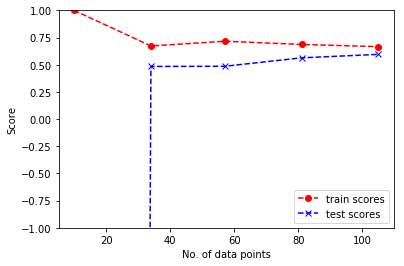

In [123]:
train_sizes, train_scores, test_scores = learning_curve(baseball_log, X, y_t, cv=4)
ave_train_scores = train_scores.mean(axis=1)
ave_test_scores = test_scores.mean(axis=1)

learn_df = pd.DataFrame({
    'train_size': train_sizes,
    'train_score': ave_train_scores,
    'test_score': ave_test_scores
})
print(learn_df)

plt.plot(learn_df['train_size'], learn_df['train_score'], 'r--o', label='train scores')
plt.plot(learn_df['train_size'], learn_df['test_score'], 'b--x', label='test scores')
plt.xlabel('No. of data points')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.ylim(-1,1)

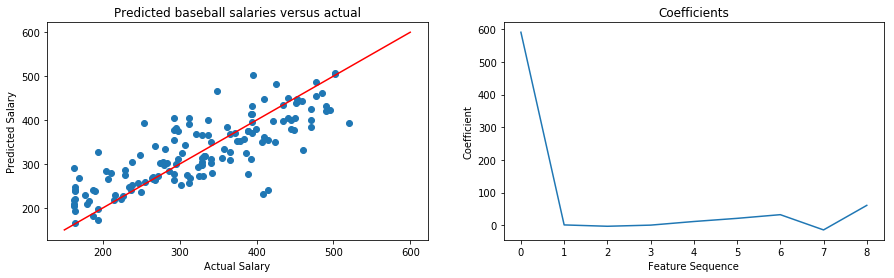

In [124]:
fig = plt.figure(figsize = (15, 4))

#Visualizing predictions versus actuals
y_train_log_predicted = baseball_log.predict(X)

plt.subplot(1, 2, 1)
plt.scatter(y_t, y_train_log_predicted)
plt.plot([150, 600], [150, 600], color='red')
plt.title('Predicted baseball salaries versus actual')
plt.ylabel('Predicted Salary')
plt.xlabel('Actual Salary');

plt.subplot(1, 2, 2)
plt.plot(baseball_log.coef_)
plt.title('Coefficients')
plt.xlabel('Feature Sequence')
plt.ylabel('Coefficient');

In [125]:
py, pX = patsy.dmatrices('y_t ~ RBI +'
                                'OBP + Age + Total_games_played +'
                                'dWAR + rootASC + First_Base +  Second_Base +'
                                'DH',
                       data=final_train, return_type="dataframe")

boxcoxmodel = sm.OLS(py, pX)
boxcoxfit = boxcoxmodel.fit()
boxcoxfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    y_t   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     28.89
Date:                Thu, 19 Jul 2018   Prob (F-statistic):           4.25e-27
Time:                        15:24:34   Log-Likelihood:                -768.16
No. Observations:                 141   AIC:                             1556.
Df Residuals:                     131   BIC:                             1586.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             88.6995     84.195      1.054      0.294     -77.858     255.257
RBI                    0.4130      0.421      0.980      0.329      -0.420       1.246
OBP                  639.0339    216.641      2.950      0.004     210.467    1067.601
Age                   -4.6820      2.147     -2.180      0.031      -8.930      -0.434
Total_games_played     0.1848      0.033      5.586      0.000       0.119       0.250
dWAR                  18.6874      7.820      2.390      0.018       3.218      34.156
rootASC               22.9662      9.926      2.314      0.022       3.330      42.602
First_Base            37.5117     19.089      1.965      0.052      -0.251      75.274
Second_Base          -12.3302     14.294     -0.863      0.390     -40.607      15.946
DH                    80.3092     23.577      3.406      0.001      33.669     126.949
==============================================================================
Omnibus:                        5.796   Durbin-Watson:                   1.778
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                6.644
Skew:                           0.271   Prob(JB):                       0.0361
Kurtosis:                       3.915   Cond. No.                     3.24e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

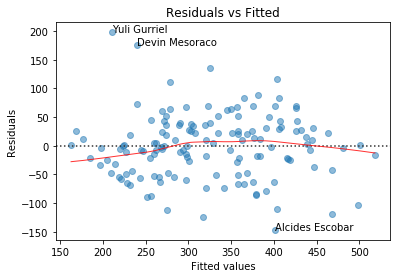

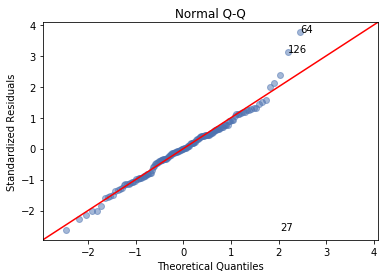

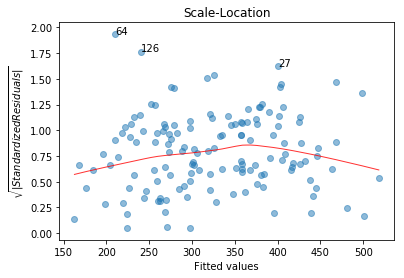

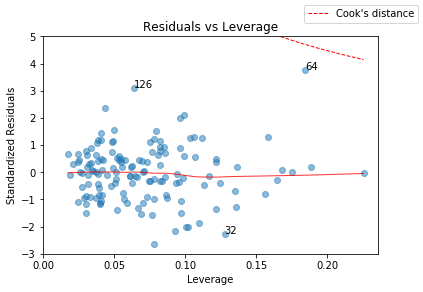

In [126]:
diagnostic_plots.diagnostic_plots(pX, py, boxcoxfit)

In [128]:
X_FINALtrain

,OBP,RBI,Age,Total_games_played,dWAR,rootASC,First_Base,Second_Base,DH
0,0.371094,47.571429,31,902,-7.857143e-01,1.000000,0.0,0.0,0.0
1,0.352817,42.428571,30,719,6.000000e-01,1.000000,0.0,0.0,0.0
2,0.320410,16.250000,28,215,-2.250000e-01,0.000000,0.0,0.0,0.0
3,0.305230,21.333333,26,211,5.333333e-01,0.000000,0.0,0.0,0.0
4,0.379887,21.428571,31,424,2.714286e-01,0.000000,0.0,0.0,0.0
5,0.329375,30.000000,34,526,-7.142857e-02,0.000000,0.0,0.0,1.0
6,0.335224,55.428571,27,961,1.442857e+00,0.000000,0.0,0.0,0.0
7,0.315227,41.666667,30,319,-1.266667e+00,0.000000,1.0,0.0,0.0
8,0.360754,87.571429,27,886,-4.285714e-02,2.000000,0.0,0.0,1.0
9,0.301891,33.600000,26,524,5.600000e-01,0.000000,0.0,1.0,0.0


In [129]:
## RETRAIN ON X_train, Y_train
## THEN TEST ON X_FINALTEST, Y_FINALTEST

In [130]:
X_FINALtrain.shape

(141, 9)

In [131]:
## CHANGE THIS TO FINAL FEATURES

X_FINALtrain = X_FINALtrain[['OBP','RBI','Age','Total_games_played',
                  'dWAR','rootASC', 'First_Base',
                  'Second_Base','DH']]

In [132]:
y_FINALtrain.shape

(141,)

In [133]:
## CHANGE THIS TO FINAL FEATURES

X_FINALTEST = X_FINALTEST[['OBP','RBI','Age','Total_games_played',
                  'dWAR','rootASC', 'First_Base',
                  'Second_Base','DH']]

In [134]:
X_FINALTEST.shape

(61, 9)

In [135]:
y_FINALTEST.shape

(61,)

In [136]:
baseball_log.fit(X_FINALtrain, y_FINALtrain)

print(baseball_log.score(X_FINALtrain, y_FINALtrain))
print(baseball_log.score(X_FINALTEST, y_FINALTEST))

0.664947064495172
0.6806258863019892


In [137]:
y_FINALTEST

Player_Name
George Springer      404.618362
Jose Reyes           484.092770
Lucas Duda           280.763444
Kyle Seager          463.554714
Kevin Pillar         274.647257
Wil Myers            302.524015
Matt Kemp            482.459732
Billy Hamilton       304.504561
Victor Martinez      456.200664
Daniel Descalso      237.707564
Martin Prado         418.975050
Todd Frazier         358.825215
Kevin Kiermaier      323.946610
Ryan Rua             185.428976
Miguel Cabrera       530.568964
Nick Ahmed           207.853971
Justin Turner        404.618362
David Peralta        275.896432
Logan Morrison       321.089961
Brandon Guyer        261.338643
Jefry Marte          162.430406
Andrew McCutchen     430.100617
Robinson Chirinos    246.191352
Ian Desmond          484.092770
Matt Adams           292.125486
Luis Valbuena        358.825215
Jose Altuve          371.570631
Salvador Perez       367.856829
Brett Gardner        399.551631
Evan Longoria        420.499411
                        ... 

In [138]:
baseball_log.predict()

TypeError: predict() missing 1 required positional argument: 'X'